# Goals
- geometric transformations : rotation, scaling, affine translation

# Transformations
- cv.warpAffine: 2x3 transformation matrix
- cv.warpPerspective: 3x3 transformation matrix

## Scaling
- cv.resize
- interpolation -> cv.INTER_AREA: shrinking, cv.INTER_CUBIC: zooming

In [2]:
import numpy as np
import cv2 as cv

img = cv.imread('messi5.jpeg')
assert img is not None, "Image not found" # 이미지가 없으면 에러를 발생시킴

res = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC) # 이미지를 2배 확대

# or
height, width = img.shape[:2]
res = cv.resize(img, (2*width, 2*height), interpolation=cv.INTER_CUBIC) # 이미지를 2배 확대

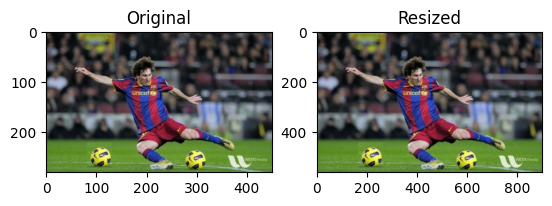

In [3]:
import matplotlib.pyplot as plt

# messi5 이미지 원본, res를 화면에 출력
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB)), plt.title('Resized')
plt.show()

## Translation
Translation은 object의 위치를 변경하는 것이다. 이동할 x, y 좌표를 입력하면 된다.
- cv.warpAffine: 2x3 transformation matrix

(<Axes: title={'center': 'Translation'}>,
 Text(0.5, 1.0, 'Translation'))

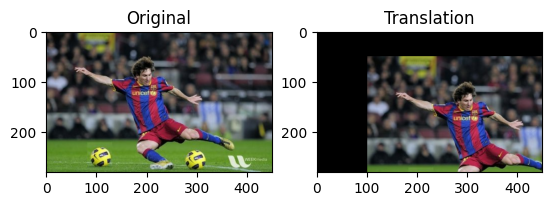

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('messi5.jpeg')
assert img is not None, "Image not found"


rows, cols = img.shape[:2]

M = np.float32([[1, 0, 100], [0, 1, 50]]) # 이미지를 오른쪽으로 100, 아래로 50 이동
dst = cv.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)), plt.title('Translation')


## Rotation

Rotation은 object를 회전하는 것이다. 회전 중심점, 각도, scale을 입력하면 된다.
- cv.getRotationMatrix2D: 2x3 transformation matrix

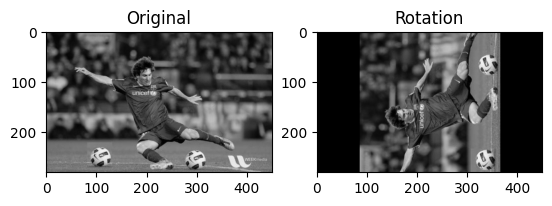

In [7]:
img = cv.imread('messi5.jpeg', cv.IMREAD_GRAYSCALE)

rows, cols = img.shape[:2]

# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1) # 이미지를 90도 회전
dst = cv.warpAffine(img, M, (cols, rows)) # 이미지를 변환

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(dst, cmap='gray'), plt.title('Rotation')
plt.show()


## Affine Transformation
평행한 선은 변환 후에도 평행하다. 세 점을 입력하면 변환된 세 점을 찾아준다. transformation matrix를 찾기 위해 cv.getAffineTransform을 사용한다. 선형성과 병렬성을 유지하면서 2D 공간에서 객체를 변형시킬 수 있는 변환 기법이다.
- cv.getAffineTransform: 2x3 transformation matrix

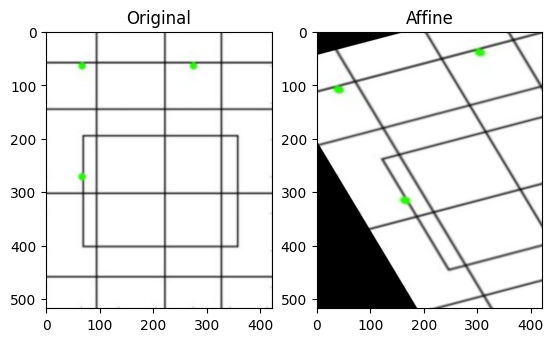

In [8]:
img = cv.imread('drawing.png')

assert img is not None, "Image not found"
rows, cols, ch = img.shape

pts1 = np.float32([[50, 50], [200, 50], [50, 200]]) # 원본 이미지의 좌표
pts2 = np.float32([[10, 100], [200, 50], [100, 250]]) # 변환된 이미지의 좌표

M = cv.getAffineTransform(pts1, pts2) 

dst = cv.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)), plt.title('Affine')
plt.show()

## Perspective Transformation
Perspective Transformation이란, 3x3 transformation matrix를 사용하여 이미지를 변환하는 것이다. 4개의 점을 입력하면 변환된 4개의 점을 찾아준다. 3D 공간의 객체를 2D 이미지로 변환하면서 원근감을 부여할 수 있는 더 일반적인 변환 방법이다.
- cv.getPerspectiveTransform: 3x3 transformation matrix

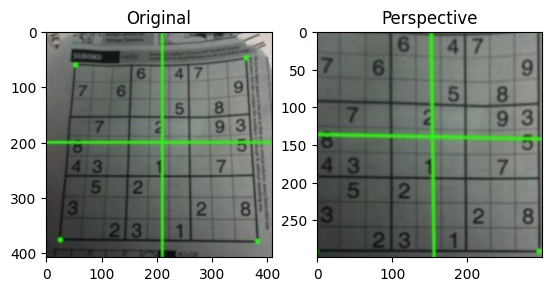

In [9]:
img = cv.imread('sudoku.png')

assert img is not None, "Image not found"
rows, cols, ch = img.shape

pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]]) # 원본 이미지의 좌표
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]]) # 변환된 이미지의 좌표

M = cv.getPerspectiveTransform(pts1, pts2) # 원근 변환 행렬을 구함
dst = cv.warpPerspective(img, M, (300, 300)) # 이미지를 변환

plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)), plt.title('Perspective')
plt.show()